In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
# Load data from a file
data = pd.read_csv('./data/college_data.csv')

print(data)

    private   apps  accept  enroll  top10perc  top25perc  f_undergrad   
0       Yes   1660    1232     721         23         52         2885  \
1       Yes   2186    1924     512         16         29         2683   
2       Yes   1428    1097     336         22         50         1036   
3       Yes    417     349     137         60         89          510   
4       Yes    193     146      55         16         44          249   
..      ...    ...     ...     ...        ...        ...          ...   
772      No   2197    1515     543          4         26         3089   
773     Yes   1959    1805     695         24         47         2849   
774     Yes   2097    1915     695         34         61         2793   
775     Yes  10705    2453    1317         95         99         5217   
776     Yes   2989    1855     691         28         63         2988   

     p_undergrad  outstate  room_board  books  personal  phd  terminal   
0            537      7440        3300    450    

# 1. Basics: Top 10% Score

In [5]:
# print 'top10perc' column without index

# 'unique()': remove index
print(data['top10perc'].unique())

[23 16 22 60 38 17 37 30 21 44  9 83 19 14 24 25 20 46 12 36 42 15 50 53
 18 34 39 28 26 11 67 45 76  5 48 10 87 71 49 32 40  8 47 29 75 27 13 35
  1 31  6 55 33  3 58 70 68 56 78 77 41  4 90 43 51 89  7 57 95 52 96  2
 65 85 86 62 54 66 79 74 80 81]


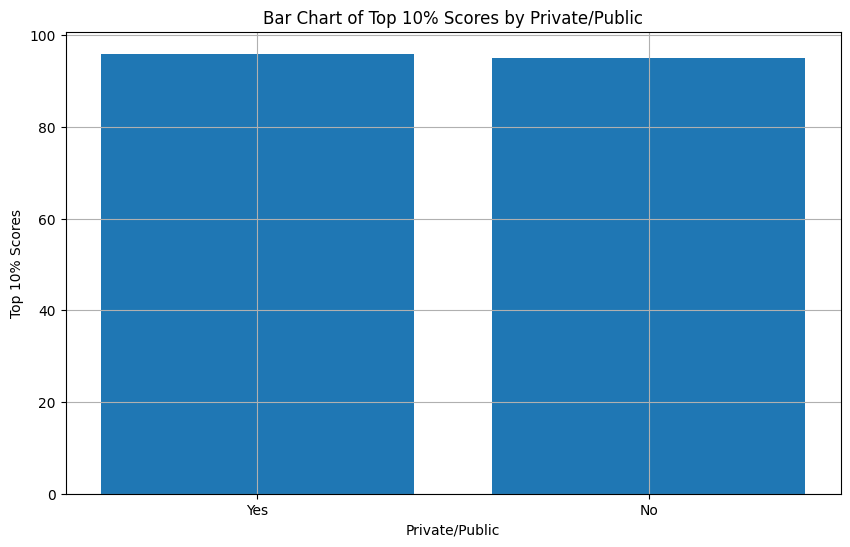

In [10]:
# Visualization: 'top10perc'
plt.figure(figsize=(10,6))
plt.bar(data['private'], data['top10perc'])
plt.title('Bar Chart of Top 10% Scores by Private/Public')
plt.xlabel('Private/Public')
plt.ylabel('Top 10% Scores')
plt.grid(100)
plt.show()

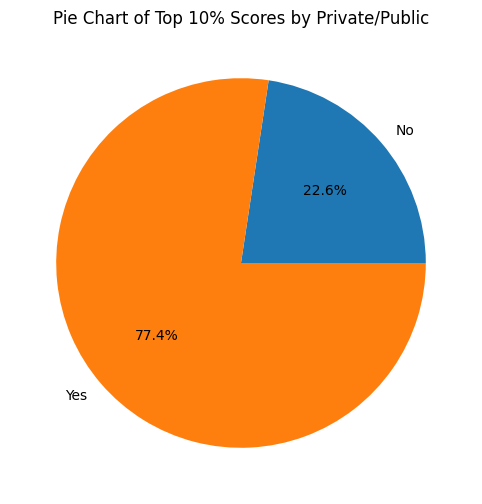

In [11]:
# Visualization: Pie Chart
plt.figure(figsize=(10, 6))

data.groupby('private')['top10perc'].sum().plot(kind='pie', autopct='%1.1f%%')

plt.title('Pie Chart of Top 10% Scores by Private/Public')
plt.ylabel('')
plt.show()

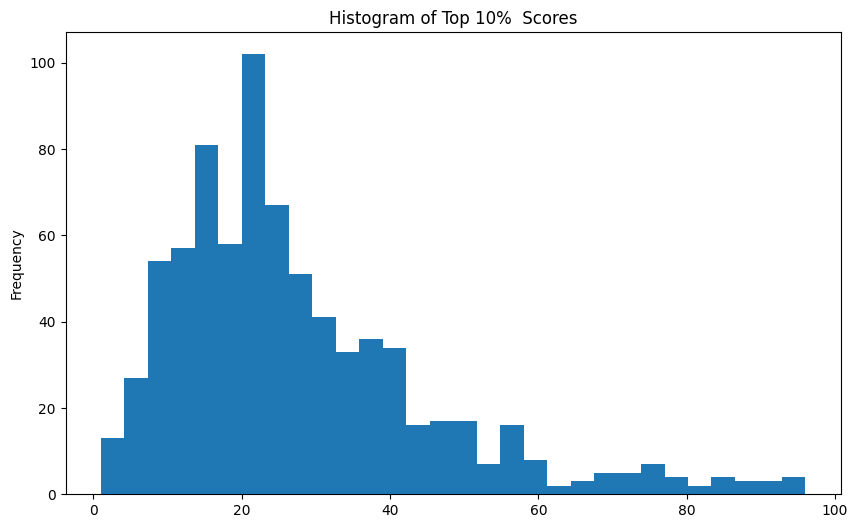

In [14]:
# Visualization: Histogram

plt.figure(figsize=(10,6))

plt.hist(data['top10perc'], bins=30)

plt.title('Histogram of Top 10%  Scores')
plt.ylabel('Frequency')
plt.show()

# 2. Frequency

## 2.1. Basics: Dice

In [19]:
# Generate data
data = np.random.randint(1, 7, size=100)  # randint(): Random int

print(data)

[6 5 6 3 4 6 3 5 1 4 4 3 4 5 6 4 5 5 6 4 3 5 3 2 1 1 1 4 4 6 6 1 5 5 4 5 1
 3 6 1 2 6 5 5 2 1 1 4 3 2 1 1 5 2 2 2 1 2 5 3 2 2 4 6 2 1 1 3 6 4 6 2 1 4
 4 2 1 5 5 2 4 2 6 6 3 1 5 2 6 4 5 5 3 3 4 3 3 6 3 3]


In [22]:
# Calcualte frequency
unique, counts = np.unique(data, return_counts=True)  # np.unique(): get unique values

print('Unique: ', unique)   # Dice: 1-6
print('Counts: ', counts)

Unique:  [1 2 3 4 5 6]
Counts:  [17 16 16 17 18 16]


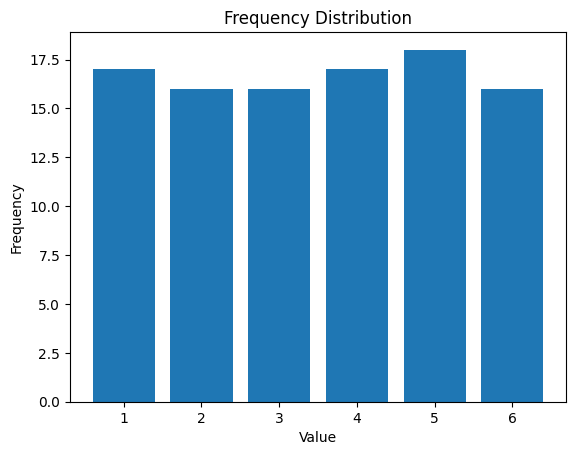

In [24]:
# Visualization: Bar graph
fix, ax = plt.subplots()

ax.bar(unique, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

ax.set_title('Frequency Distribution')

plt.show()

## 2. Relative Frequency

In [27]:
# Generate data
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6,]) # List type

print(data)
print(type(data))

[1 2 2 3 3 3 4 4 5 5 5 5 6 6 6 6]
<class 'numpy.ndarray'>


In [33]:
# Calculate frequency

value_counts = np.bincount(data)
print(value_counts)

[0 1 2 3 2 4 4]


In [35]:
# Calculate Relative Frequency
relative_frequencies = value_counts / len(data)  

print(len(data))  # The total number of data
print(relative_frequencies)

20
[0.   0.05 0.1  0.15 0.1  0.2  0.2 ]


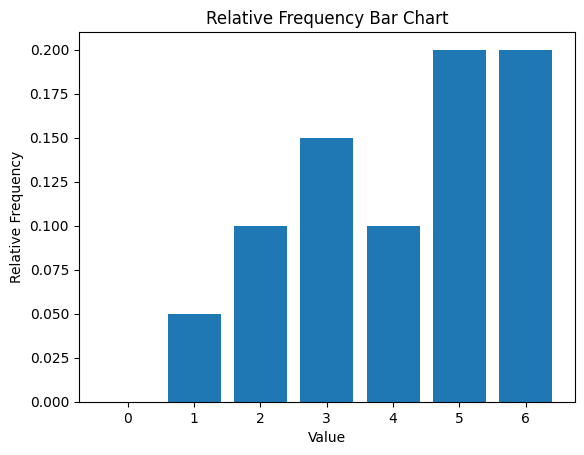

In [38]:
# Visualization: Bar graph
plt.bar(np.arange(len(value_counts)), relative_frequencies)

plt.xticks(np.arange(len(value_counts)), np.arange(len(value_counts)))

plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency Bar Chart')

plt.show()

In [46]:
# Print frequency

# Import modules
from collections import Counter

# Define 'print_frequency'
def print_frequency(numbers):
    # Calculate Frequency
    counts = Counter(numbers)
    
    # Make a pair of Frequency and Number of values
    frequency_list = [(count, number) for number, count in counts.items()]
    
    # Order by frequency
    stored_list = sorted(frequency_list)
    
    # Print a result
    for count, number in sorted_list:
        print(f"Numbers: {number}, Frequency: {count}")
        

# Call a function
print_frequency(data)

SyntaxError: invalid character in identifier (3549230927.py, line 12)

## 2.3. Percentages

In [42]:
# Generate data
labels = ['A', 'B', 'C', 'D', 'E']
percentages = [15, 20, 30, 25, 10]

Text(0.5, 1.0, 'Percentages of Categories')

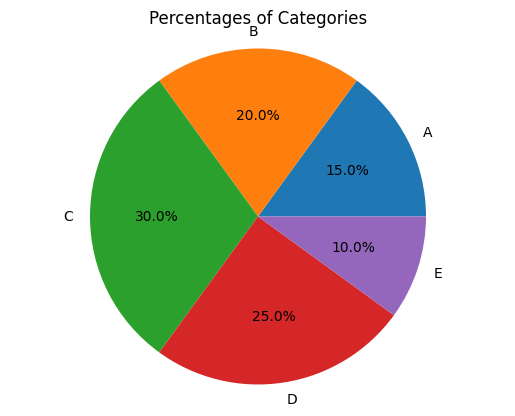

In [44]:
# Visualization: Pie chart
fix, ax = plt.subplots()

ax.pie(percentages, labels=labels, autopct='%1.1f%%')
ax.axis('equal')

ax.set_title('Percentages of Categories')

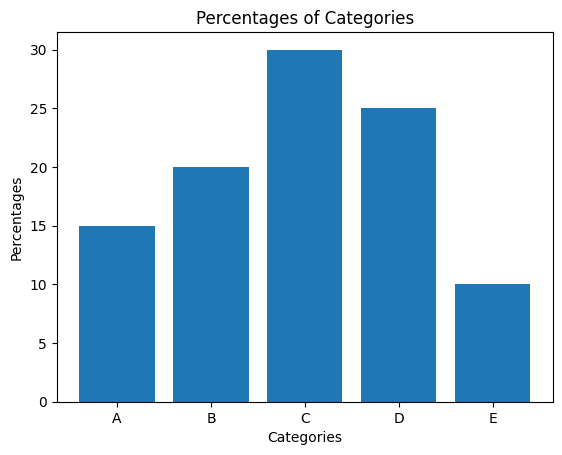

In [45]:
# Visualization: Bar graph
fix, ax = plt.subplots()

ax.bar(labels, percentages)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentages')
ax.set_title('Percentages of Categories')

plt.show()

# 3. Q-Q Plot

In [3]:
# Load dataset
titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


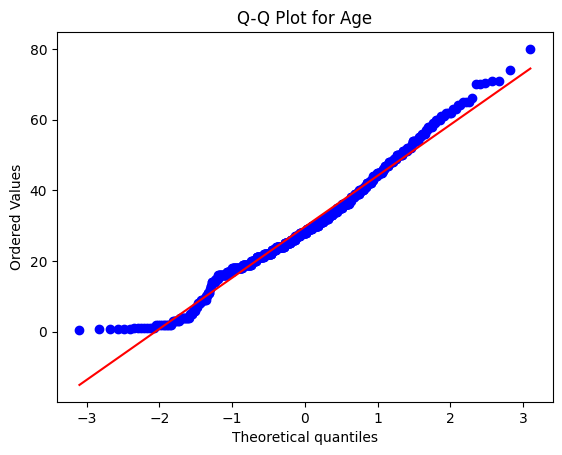

In [4]:
# Visualization: Q-Q plot for ages
stats.probplot(titanic['age'].dropna(), 
               dist='norm',  # distribution: normal distribution
               plot=plt)

plt.title('Q-Q Plot for Age')
plt.show()